<a href="https://colab.research.google.com/github/Ultor666/MAE551_PS1/blob/main/ICA_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mne

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.6 MB 5.2 MB/s 


In [ ]:
!pip install spkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 5.2 MB/s 


In [ ]:
import spkit as sp
from spkit.data import load_data
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA
import seaborn as sns
# Apply the default theme
sns.set(style="ticks")
sns.set_style("darkgrid")

In [ ]:
eeg_data, channel_names = load_data.eegSample()
fs = 128
eeg_data = sp.filter_X(eeg_data, band=[0.5], btype='highpass',fs=fs,verbose=0)

In [ ]:
eeg_data.shape

(2048, 14)

In [ ]:
print(channel_names, len(channel_names))

['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4'] 14


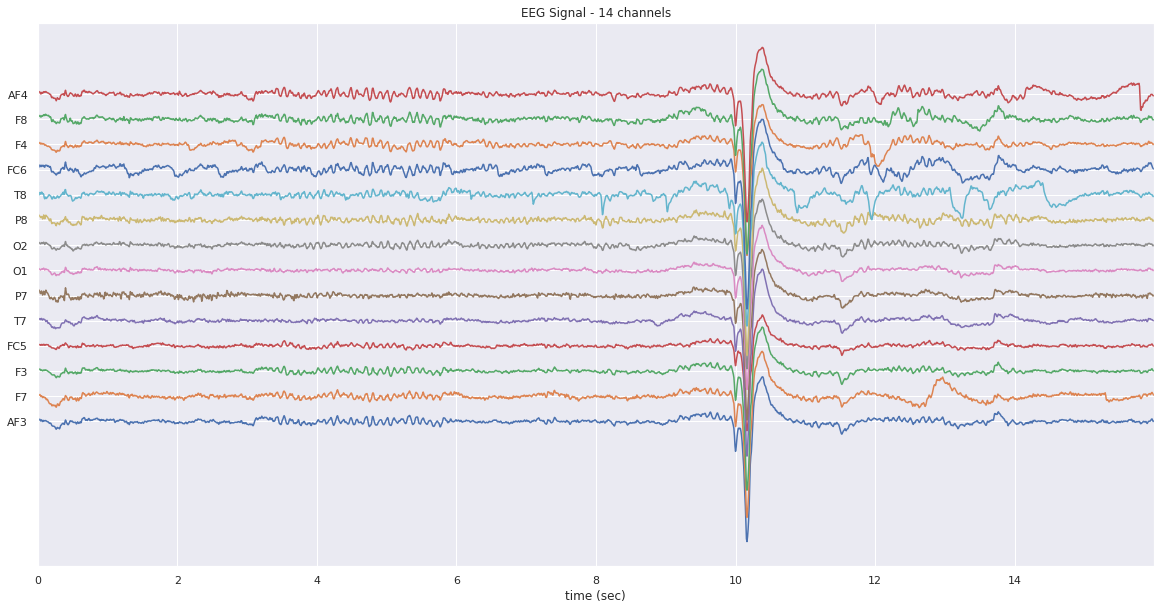

In [ ]:
t = np.arange(eeg_data.shape[0])/fs
plt.figure(figsize=(20,10))
plt.plot(t, eeg_data + np.arange(-7,7)*200)
plt.xlim([t[0],t[-1]])
plt.xlabel('time (sec)')
plt.yticks(np.arange(-7,7)*200, channel_names)
plt.title('EEG Signal - 14 channels')
plt.show()

In [ ]:
ica = FastICA(n_components=14, random_state=0, tol=0.05)
components = ica.fit_transform(eeg_data)

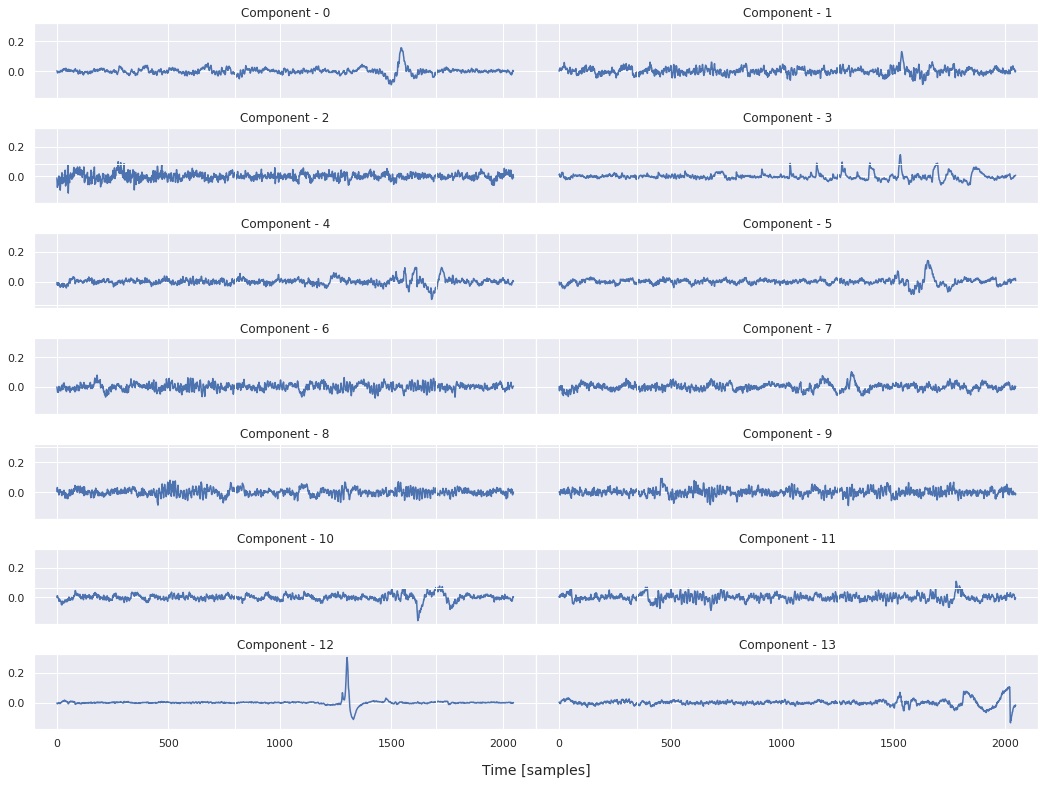

In [ ]:
fig, axs = plt.subplots(7,2, figsize=(18, 13), sharex=True, sharey=True)
fig.subplots_adjust(hspace = .4, wspace=0)
axs = axs.ravel()

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xlabel('Time [samples]', fontsize=14, labelpad=15)

for index in range(14):
    axs[index].plot(components[:, index])
    axs[index].set_title("Component - " + str(index))

In [ ]:
components_restored = components.copy()
components_restored[:,[12]] = 0
restored = ica.inverse_transform(components_restored)

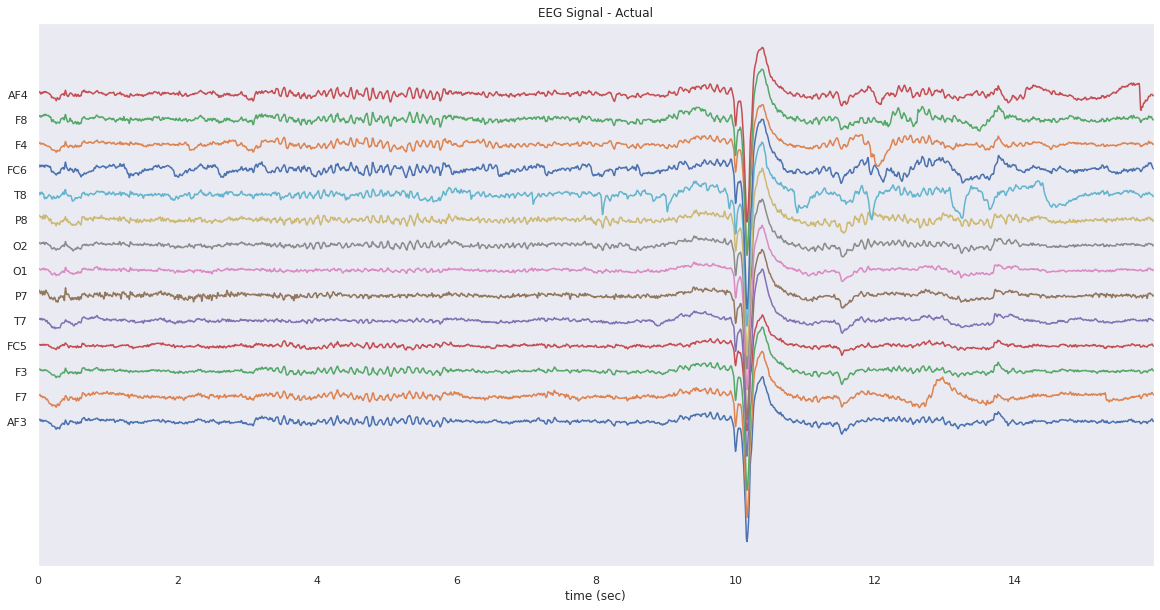

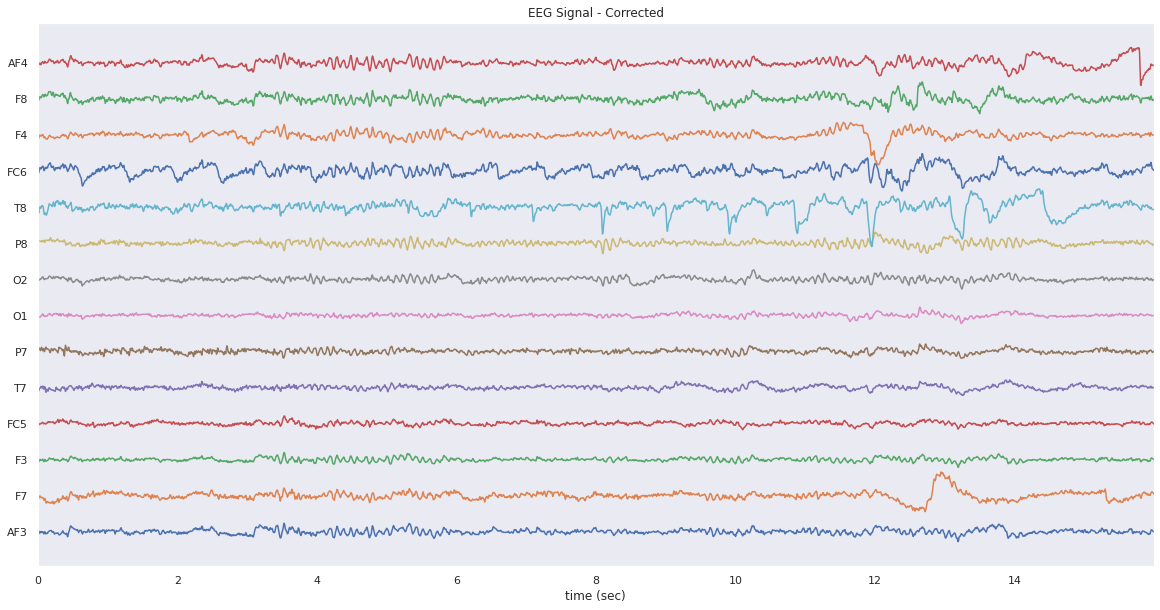

In [ ]:
t = np.arange(eeg_data.shape[0])/fs
plt.figure(figsize=(20,10))
plt.plot(t, eeg_data + np.arange(-7,7)*200)
plt.xlim([t[0],t[-1]])
plt.xlabel('time (sec)')
plt.yticks(np.arange(-7,7)*200, channel_names)
plt.grid()
plt.title('EEG Signal - Actual')
plt.show()

t = np.arange(restored.shape[0])/fs
plt.figure(figsize=(20,10))
plt.plot(t, restored + np.arange(-7,7)*200)
plt.xlim([t[0],t[-1]])
plt.xlabel('time (sec)')
plt.yticks(np.arange(-7,7)*200, channel_names)
plt.grid()
plt.title('EEG Signal - Corrected')
plt.show()

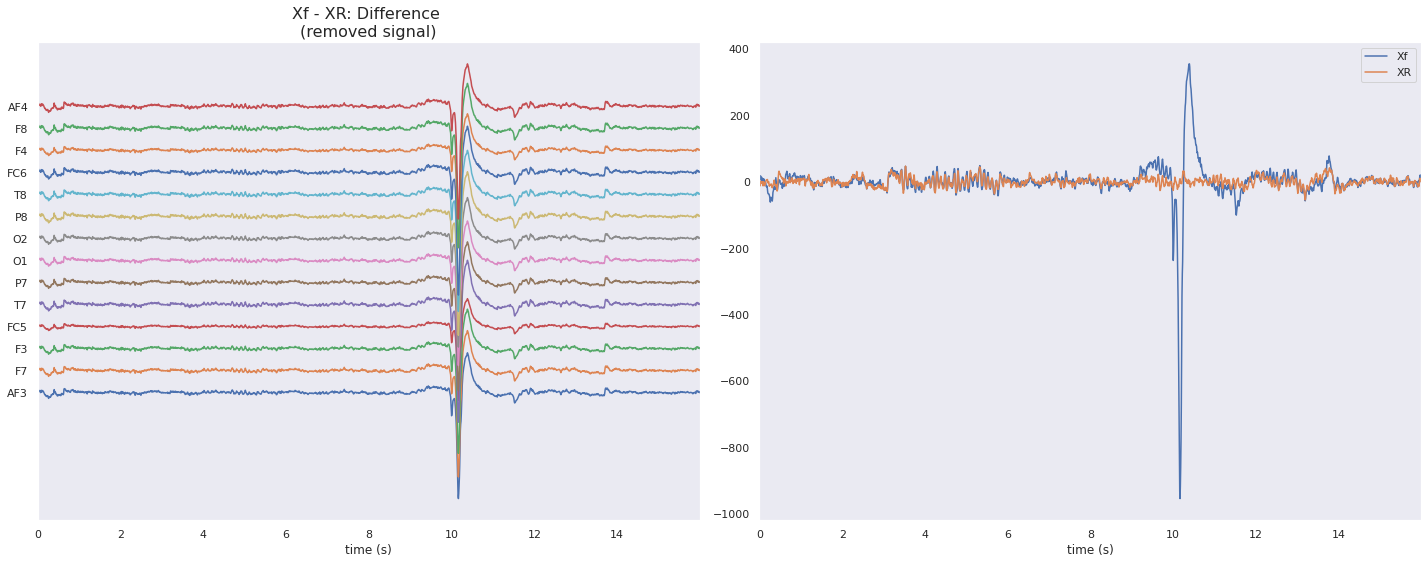

In [ ]:
plt.figure(figsize=(20,8))
plt.subplot(121)
plt.plot(t,(eeg_data-restored)+np.arange(-7,7)*200)
plt.xlim([t[0],t[-1]])
plt.xlabel('time (s)')
plt.yticks(np.arange(-7,7)*200,channel_names)
plt.grid()
plt.title('Xf - XR: Difference \n(removed signal)',fontsize=16)
# #plt.show()
plt.subplot(122)
plt.plot(t,eeg_data[:,0],label='Xf')
plt.plot(t,restored[:,0],label='XR')
#plt.plot(t,Xf[:,0]-XR[:,0])
plt.xlim([t[0],t[-1]])
plt.xlabel('time (s)')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()